In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data  = pd.read_csv("Data//Report.csv", header=None)
data.index =pd.date_range(start='1/1/2017', periods=13, freq='M')
data.columns = ['Value']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13 entries, 2017-01-31 to 2018-01-31
Freq: M
Data columns (total 1 columns):
Value    13 non-null int64
dtypes: int64(1)
memory usage: 208.0 bytes


In [3]:
type(data['Value'][0])

numpy.int64

In [4]:
data['Value'] = data['Value'].astype(np.float64)
type(data['Value'][0])

numpy.float64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


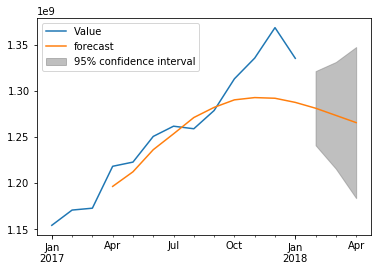

In [9]:
res = sm.tsa.ARMA(data, (3, 0)).fit()
fig, ax = plt.subplots()
ax = data.loc['2017-01-31':].plot(ax=ax)
fig = res.plot_predict('2017-04-30', '2018-4-30', dynamic=True, ax=ax, plot_insample=False)
plt.show()